Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)

Load the data and understand it

In [2]:
survey_df = pd.read_csv('/Users/naveedrafi/PycharmProjects/DS-Nanodegree/DS-Blog/Data/SO_dev_survey/survey_results_public.csv')
schema_df = pd.read_csv('/Users/naveedrafi/PycharmProjects/DS-Nanodegree/DS-Blog/Data/SO_dev_survey/survey_results_schema.csv')

# describe the data

# how many people have we surveyed?
print(survey_df.shape[0])

# how many questions did we ask?
print(schema_df.shape[0])

survey_df.describe()

51392
154


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


List of column names

In [3]:
# list(survey_df.columns)

Sample data

In [4]:
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

Function to get question description

In [5]:
# get the full question for a column

def get_question(col_name, schema_df):    
    return list(schema_df[schema_df['Column']==col_name]['Question'])[0]

In [6]:
# 'AuditoryEnvironment'
get_question('BoringDetails', schema_df)

'I tend to get bored by implementation details'

In [7]:
# Lets look at the respondents propensity to solve problems
survey_df['ProblemSolving'].value_counts()

Strongly agree       18040
Agree                11084
Somewhat agree        1890
Disagree               179
Strongly disagree      100
Name: ProblemSolving, dtype: int64

In [8]:
# Lets look at the respondents propensity to build things
survey_df['BuildingThings'].value_counts()

Strongly agree       17433
Agree                11419
Somewhat agree        2054
Disagree               248
Strongly disagree       80
Name: BuildingThings, dtype: int64

In [9]:
# Lets look at the respondents propensity to learn new things
survey_df['LearningNewTech'].value_counts()

Strongly agree       15318
Agree                12452
Somewhat agree        3042
Disagree               370
Strongly disagree      122
Name: LearningNewTech, dtype: int64

In [10]:
# Lets look at the respondents propensity get into boring details
survey_df['BoringDetails'].value_counts()

Disagree             11870
Somewhat agree        9864
Agree                 5134
Strongly disagree     2742
Strongly agree        1574
Name: BoringDetails, dtype: int64

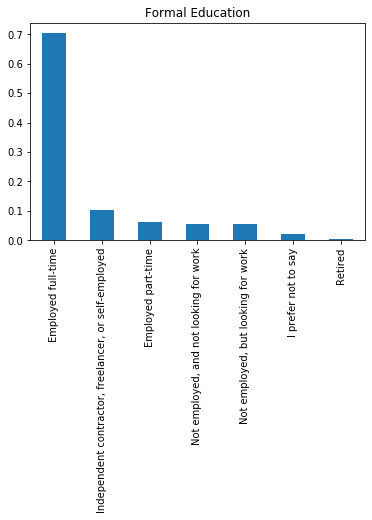

In [11]:
# It looks like most employed respondents like building new things, learning new technologies, and solving problems 
# but when it comes to implemntation details, the split is a bit more even across the agreement spectrum
# We will look at this in more detail

# lets create a dataframe with required columns from the survey
audio_df = survey_df[['Professional', 'EmploymentStatus', 'BoringDetails', 'AuditoryEnvironment', 'JobSatisfaction']]

# we will try to see what type of auditory environment is best suited to deal with implementation detail

# to keep things simple we will look at those who are employed and from the chart below we can see that its the majority of the respondents
(audio_df.EmploymentStatus.value_counts()/audio_df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

In [12]:
# keep the employed respondents only
employed_audio_df = audio_df[audio_df['EmploymentStatus'] == 'Employed full-time']
# Drop students and none of these who have responded employed
employed_audio_df = employed_audio_df[(employed_audio_df['Professional'] != 'Student')]
employed_audio_df = employed_audio_df[(employed_audio_df['Professional'] != 'None of these')]

# Drop respondents with something else as response to audio environment
employed_audio_df = employed_audio_df[(employed_audio_df['AuditoryEnvironment'] != 'Something else')]

In [13]:
# check the data size
employed_audio_df.shape

(33781, 5)

In [14]:
# check how many responses do we actually have for audio environment
perc_responses = (1 - (employed_audio_df['AuditoryEnvironment'].isna().sum()/employed_audio_df.shape[0]))*100

print(perc_responses) # 73% of employed responsdents have answered this question

73.36076492702999


In [15]:
employed_audio_df

,Professional,EmploymentStatus,BoringDetails,AuditoryEnvironment,JobSatisfaction
2,Professional developer,Employed full-time,Somewhat agree,Turn on some music,9.0
3,Professional non-developer who sometimes writes code,Employed full-time,Disagree,Turn on some music,3.0
4,Professional developer,Employed full-time,NaN,NaN,8.0
6,Professional non-developer who sometimes writes code,Employed full-time,NaN,Turn on some music,6.0
7,Professional developer,Employed full-time,NaN,Turn on some music,7.0
...,...,...,...,...,...
51386,Professional developer,Employed full-time,Disagree,Turn on some music,4.0
51387,Professional developer,Employed full-time,Somewhat agree,Turn on some music,3.0
51389,Professional developer,Employed full-time,NaN,NaN,10.0
51390,Professional developer,Employed full-time,Strongly disagree,Turn on some music,7.0


In [16]:
# employment status is no longer needed
employed_audio_df = employed_audio_df.drop('EmploymentStatus', axis=1)

In [17]:
employed_audio_df.Professional.value_counts()

Professional developer                                  29483
Professional non-developer who sometimes writes code     3735
Used to be a professional developer                       563
Name: Professional, dtype: int64

In [18]:
# Seems like we may need to group active vs inactive developers and drop students
def active_dev(value):
    if value == 'Professional developer':
        return True
    else:
        return False


employed_audio_df['ActiveDeveloper'] = employed_audio_df['Professional'].apply(active_dev)

employed_audio_df


,Professional,BoringDetails,AuditoryEnvironment,JobSatisfaction,ActiveDeveloper
2,Professional developer,Somewhat agree,Turn on some music,9.0,True
3,Professional non-developer who sometimes writes code,Disagree,Turn on some music,3.0,False
4,Professional developer,NaN,NaN,8.0,True
6,Professional non-developer who sometimes writes code,NaN,Turn on some music,6.0,False
7,Professional developer,NaN,Turn on some music,7.0,True
...,...,...,...,...,...
51386,Professional developer,Disagree,Turn on some music,4.0,True
51387,Professional developer,Somewhat agree,Turn on some music,3.0,True
51389,Professional developer,NaN,NaN,10.0,True
51390,Professional developer,Strongly disagree,Turn on some music,7.0,True


In [19]:
# now Professtional column is no longer needed either
employed_audio_df = employed_audio_df.drop('Professional', axis=1)
employed_audio_df

,BoringDetails,AuditoryEnvironment,JobSatisfaction,ActiveDeveloper
2,Somewhat agree,Turn on some music,9.0,True
3,Disagree,Turn on some music,3.0,False
4,NaN,NaN,8.0,True
6,NaN,Turn on some music,6.0,False
7,NaN,Turn on some music,7.0,True
...,...,...,...,...
51386,Disagree,Turn on some music,4.0,True
51387,Somewhat agree,Turn on some music,3.0,True
51389,NaN,NaN,10.0,True
51390,Strongly disagree,Turn on some music,7.0,True


In [20]:
# To answer the question "What affect does music have on boring details", we will group

employed_audio_df['ActiveDeveloper'].mean() # 87% are active developers

active_employed_audio_df = employed_audio_df[employed_audio_df['ActiveDeveloper'] == True]
inactive_employed_audio_df = employed_audio_df[employed_audio_df['ActiveDeveloper'] == False]

In [21]:
employed_audio_df

,BoringDetails,AuditoryEnvironment,JobSatisfaction,ActiveDeveloper
2,Somewhat agree,Turn on some music,9.0,True
3,Disagree,Turn on some music,3.0,False
4,NaN,NaN,8.0,True
6,NaN,Turn on some music,6.0,False
7,NaN,Turn on some music,7.0,True
...,...,...,...,...
51386,Disagree,Turn on some music,4.0,True
51387,Somewhat agree,Turn on some music,3.0,True
51389,NaN,NaN,10.0,True
51390,Strongly disagree,Turn on some music,7.0,True


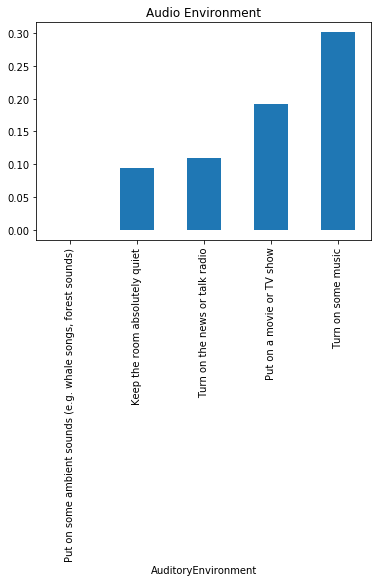

In [23]:
(employed_audio_df.groupby(['AuditoryEnvironment']).mean()['JobSatisfaction'] - 6.739280).sort_values().plot(kind="bar")
plt.title("Audio Environment");

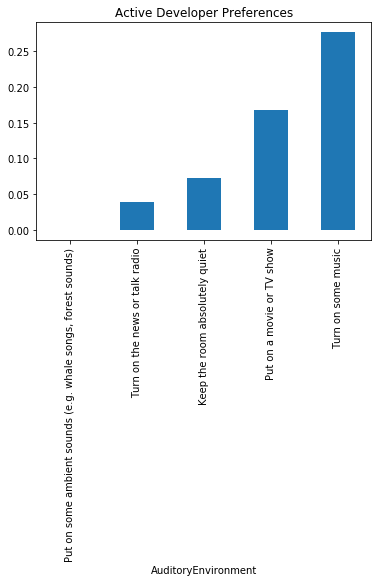

In [25]:
(active_employed_audio_df.groupby(['AuditoryEnvironment']).mean()['JobSatisfaction'] - 6.797502).sort_values().plot(kind="bar")
plt.title("Active Developer Preferences");

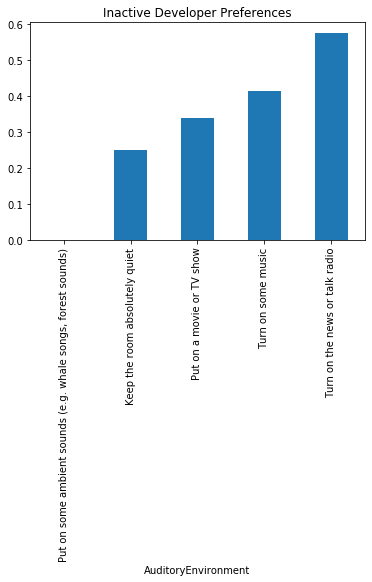

In [24]:
(inactive_employed_audio_df.groupby(['AuditoryEnvironment']).mean()['JobSatisfaction'] - 6.350877).sort_values().plot(kind="bar")
plt.title("Inactive Developer Preferences");